# Урок 2.  
# Масштабирование признаков.  
# L1- и L2-регуляризация.  
# Стохастический градиентный спуск

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

# Виды масштабирования признаков

![img/normalization.png](img/normalization.png)

### MinMaxScaler  

$$\large X_{norm} = \frac{X – X_{min}}{X_{max}-X_{min}}$$

In [3]:
X[1].min(), X[1].max()

(0, 10)

In [4]:
X[2].min(), X[2].max()

(450, 2000)

In [5]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [6]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 1.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

### Стандартизация  

$$\large X_{norm} = \frac{X – X_{mean}}{std}$$

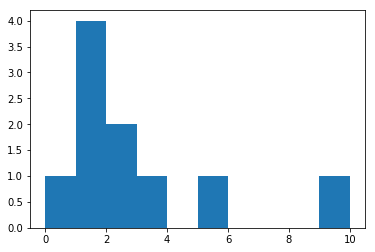

In [8]:
plt.hist(X[1]);

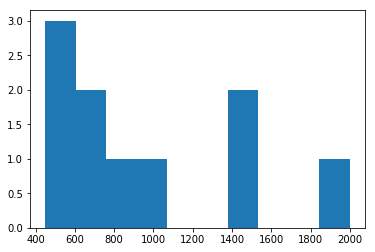

In [9]:
plt.hist(X[2]);

In [10]:
X1_mean = X[1].mean()
X1_mean

2.6

In [11]:
X1_std = X[1].std()
X1_std

2.8000000000000003

In [12]:
X_st = X.copy().astype(np.float64)

In [13]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-5.71428571e-01, -5.71428571e-01, -2.14285714e-01,
        -5.71428571e-01,  1.42857143e-01, -9.28571429e-01,
         8.57142857e-01,  2.64285714e+00, -5.71428571e-01,
        -2.14285714e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

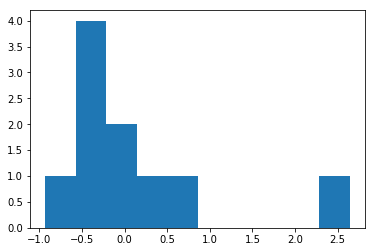

In [14]:
plt.hist(X_st[1]);

In [15]:
def custom_StandardScaler(x):
    res = (x - x.mean()) / x.std()
    return res

In [16]:
X_st[2] = custom_StandardScaler(X[2])

In [17]:
X_st[3] = custom_StandardScaler(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

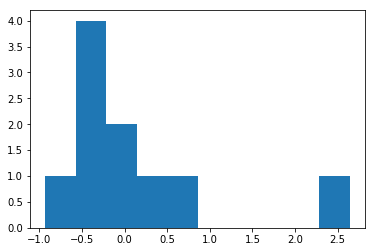

In [18]:
plt.hist(X_st[1]);

# SGD

Как нейронные сети обучаются с помощью градиентного спуска:  
https://www.youtube.com/watch?v=IHZwWFHWa-w

In [19]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [20]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [21]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

# итерация: 100, MSE: 100.62739200335359, веса: [49.7750532   5.2018159   2.91536375  3.49437927]
# итерация: 200, MSE: 41.05952817155104, веса: [56.38878294  5.36226711  2.67991518  3.60809036]
# итерация: 300, MSE: 39.9478407342027, веса: [57.26589284  5.48676556  2.47344034  3.69297185]
# итерация: 400, MSE: 39.88363435994691, веса: [57.38221477  5.59091906  2.301015    3.76356951]
# итерация: 500, MSE: 39.85136529416651, веса: [57.39764133  5.67806158  2.15704895  3.82233386]
# итерация: 600, MSE: 39.82908204281376, веса: [57.39968719  5.7509579   2.03684293  3.87126349]
# итерация: 700, MSE: 39.81354633805647, веса: [57.39995852  5.81192676  1.93647403  3.91201569]
# итерация: 800, MSE: 39.80271228681834, веса: [57.3999945   5.86291203  1.85266743  3.94596573]
# итерация: 900, MSE: 39.795156926156544, веса: [57.39999927  5.9055427   1.78268921  3.97425548]
# итерация: 1000, MSE: 39.78988801357225, веса: [57.3999999   5.94118342  1.72425698  3.99783356]


array([57.3999999 ,  5.94118342,  1.72425698,  3.99783356])

In [22]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [23]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=5, alpha=1e-2)

# итерация: 500, MSE: 41.298241521882304, веса: [57.39614676  5.52742284  2.41890134  3.73336861]
# итерация: 1000, MSE: 39.48525372691883, веса: [57.39810508  5.89418943  1.82577216  3.96593093]
# итерация: 1500, MSE: 38.7649312803346, веса: [57.39791738  6.04249391  1.5850552   4.06087451]
# итерация: 2000, MSE: 38.475592600977315, веса: [57.39784129  6.1025418   1.48737284  4.09953719]
# итерация: 2500, MSE: 38.35864613429654, веса: [57.39781044  6.12687473  1.44773658  4.115258  ]
# итерация: 3000, MSE: 38.31126322568729, веса: [57.39779793  6.13673988  1.43165422  4.12164466]
# итерация: 3500, MSE: 38.29204760417433, веса: [57.39779286  6.14074062  1.42512901  4.1242379 ]
# итерация: 4000, MSE: 38.28425234826271, веса: [57.3977908   6.14236337  1.42248153  4.12529053]
# итерация: 4500, MSE: 38.28108968182742, веса: [57.39778997  6.14302166  1.42140738  4.12571773]
# итерация: 5000, MSE: 38.279806497992084, веса: [57.39778963  6.14328871  1.42097157  4.12589108]


array([57.39778963,  6.14328871,  1.42097157,  4.12589108])

### Регуляризация  

По сути, регуляризация - это ограничение модели.  
Для нас это, прежде всего, способ уменьшить сложность модели, чтобы предотвратить переобучение.
Проблема: признаки могут иметь линейную (или почти линейную) зависимость.  
Если у нас есть такие признаки, модель будет не устойчива к изменению в данных (большой variance).  
Чтобы побороть этот эффект, модель при обучении дополнительно ограничивают, используя **регуляризацию**.

Подробнее здесь:  
https://habr.com/ru/company/ods/blog/323890/  
и здесь:  
https://habr.com/ru/company/ods/blog/322076/  

L1 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right)  + \lambda \sum_{j=1}^m \left| w_j \right|$$

L2 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda \frac{1}{2} \sum_{j=1}^m w_j^2$$

In [24]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [25]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

# итерация: 500, MSE: 39.98166412253417, веса: [57.39479705  5.10767868  2.46037345  4.08674902]
# итерация: 1000, MSE: 39.80723120406399, веса: [57.39713005  5.765859    1.85689028  4.03893236]
# итерация: 1500, MSE: 39.78240504280036, веса: [57.39713014  5.99060723  1.60529698  4.06885866]
# итерация: 2000, MSE: 39.778523565788916, веса: [57.39713014  6.07152025  1.50155606  4.09300748]
# итерация: 2500, MSE: 39.777887486171274, веса: [57.39713014  6.10185559  1.45905205  4.10572941]
# итерация: 3000, MSE: 39.77777930470262, веса: [57.39713014  6.11355928  1.44170275  4.11160375]
# итерация: 3500, MSE: 39.77775983405892, веса: [57.39713014  6.11816175  1.43463681  4.11416107]
# итерация: 4000, MSE: 39.77775594321602, веса: [57.39713014  6.11999396  1.43176283  4.1152412 ]
# итерация: 4500, MSE: 39.777755024514185, веса: [57.39713014  6.12072893  1.43059479  4.11568989]
# итерация: 5000, MSE: 39.77775476050768, веса: [57.39713014  6.12102515  1.4301203   4.11587451]


array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

### Домашнее задание:  
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  
3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [26]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#        if i % (iterations / 10) == 0:
#            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
#    print(f'# lambda: {lambda_}, MSE: {err}, веса: {W}')
    return lambda_, W


In [27]:
arr_l = 10.0 ** np.arange(-3,1,0.1)
x_graph = []
y_graph = []

for l_ in arr_l:
    data = eval_model_reg2(X_st, y, iterations=1000, alpha=1e-2, lambda_=l_)  
    x_graph.append(data[0])
    y_graph.append(data[1])
    
y_graph = np.array(y_graph)


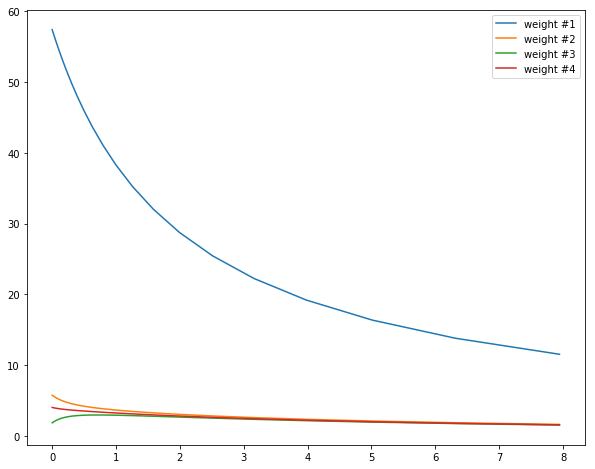

In [28]:
plt.figure(figsize=(10, 8))

plt.plot(x_graph, y_graph[:,0], label='weight #1')
plt.plot(x_graph, y_graph[:,1], label='weight #2')
plt.plot(x_graph, y_graph[:,2], label='weight #3')
plt.plot(x_graph, y_graph[:,3], label='weight #4')
plt.legend();

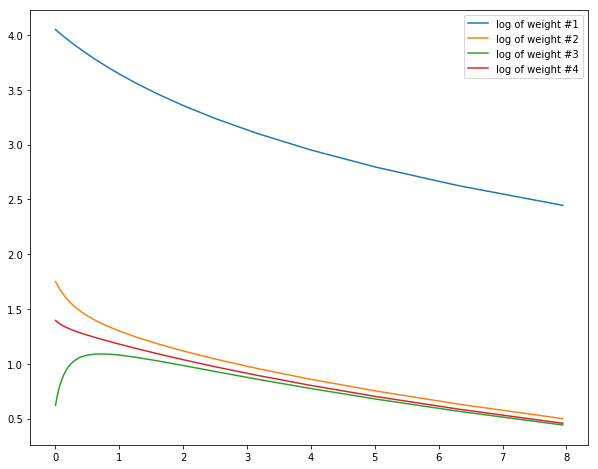

In [29]:
plt.figure(figsize=(10, 8))

plt.plot(x_graph, np.log(y_graph[:,0]), label='log of weight #1')
plt.plot(x_graph, np.log(y_graph[:,1]), label='log of weight #2')
plt.plot(x_graph, np.log(y_graph[:,2]), label='log of weight #3')
plt.plot(x_graph, np.log(y_graph[:,3]), label='log of weight #4')
plt.legend();

### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  

Нормализация - приведение данных к диапазону [0,1]
Стандартизация - приведение данных к стандартному отклонению 1 и среднему значению 0.
Оба применить можно, но эффект будет иметь только тот метод, который применен последним.
Одновременно и стандартизованными и нормализованными данные быть не могут.

### 3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *

In [39]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
#        if i % (iterations / 10) == 0:
#            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
#    print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return lambda_, W

eval_model_reg1(X_st, y, iterations=1000, alpha=1e-2, lambda_=1e-3)

(0.001, array([57.3994999 ,  5.76633719,  1.85608172,  4.03893983]))

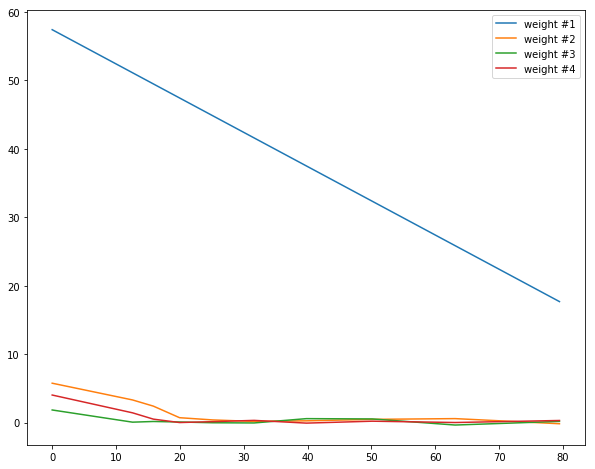

In [42]:
arr_l = 10.0 ** np.arange(-2,2,0.1)
x_graph = []
y_graph = []

for l_ in arr_l:
    data = eval_model_reg1(X_st, y, iterations=1000, alpha=1e-2, lambda_=l_)  
    x_graph.append(data[0])
    y_graph.append(data[1])
    
y_graph = np.array(y_graph)

plt.figure(figsize=(10, 8))

plt.plot(x_graph, y_graph[:,0], label='weight #1')
plt.plot(x_graph, y_graph[:,1], label='weight #2')
plt.plot(x_graph, y_graph[:,2], label='weight #3')
plt.plot(x_graph, y_graph[:,3], label='weight #4')
plt.legend();